In [1]:
# set up the basic libraries
import plotly.io as pio
pio.renderers
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# import the dataset
df = pd.read_csv("netflix_titles.csv")

In [3]:
# check of the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


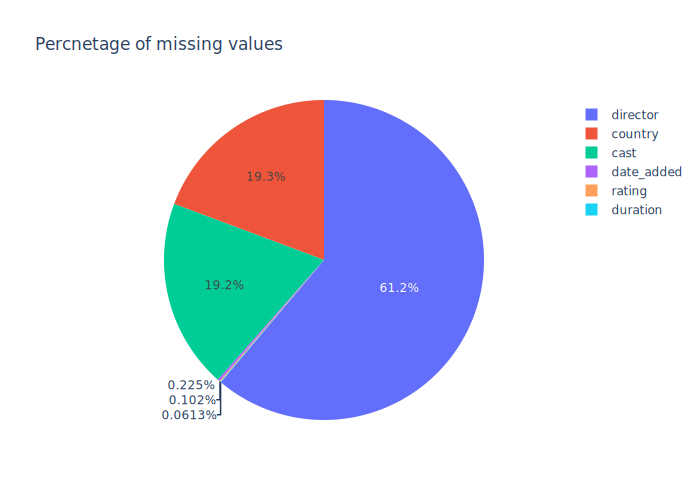

In [5]:
# compute the the values and the percentage of the missing values
missing_value = df.isna().sum()
missing_value = missing_value.reset_index().rename(columns={
    
            "index": "Column",
            0:'missing_value'
})


percentage = pd.DataFrame(df.isna().sum() * 100 / df.shape[0],).round(2)
percentage = percentage.reset_index().rename(columns={
    
            "index": "Column",
            0:'Missing_Percentage (%)'
})



Final = missing_value.merge(percentage, how = 'inner', left_on = 'Column', right_on = 'Column')
Final["Missing_Percentage (%..)"] = Final["Missing_Percentage (%)"].astype(str)
Final=Final[Final["missing_value"]>0]
fig = px.pie(Final, names="Column", values ="Missing_Percentage (%)" , hover_name="Missing_Percentage (%..)",
             title="Percnetage of missing values", labels="Missing_Percentage (%..)")
fig.show(renderer="svg")

From the chart above, Director column has the highest percentage of missing value follow by country, with duration column having least percentage. All these missing values will be treated in appropraite way later on

# Next I will  be treating the missing values appropriately and also delete the duplicate rows if they exist, 


In [6]:
# check for the duplicat
df.duplicated().sum()

0

# Rating column 
The rating column consist of wrong inputs, I will replace such input with most frequence "TV-MA" data, I also i will fill the missing values with most frequency and lastly on this column i will rename the rating in standard way of .. for better and easy understandiing 

In [7]:
# check the statistic info of the rating column
df['rating'].describe()

count      8803
unique       17
top       TV-MA
freq       3207
Name: rating, dtype: object

In [8]:
# replace the wrong rating inputs with the most frequence

df['rating'] = df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
df['rating'] = df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})
df['rating'].fillna("TV-MA", inplace=True)
df['rating'].nunique()


13

# For proper understanding of the rating, I rename the input according to
# Source : https://help.netflix.com/en/node/2064

In [9]:
# rename the rating
df['rating'] = df['rating'].replace({
                'PG-13': 'Teens(13) and Age above ',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens with parental guidence ',
                'TV-PG': 'Kids with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'older children',
                'R': 'Adults',
                'TV-G': 'all_age',
                 'G': 'all_age',
                'NC-17': 'Adults',
                'NR': 'Not Rated',
                'UR' : 'Not Rated'
                
})

df['rating'].nunique()


9

# Director Column
Here i will fill the missing values with "No Entry". 

In [10]:
df["director"].fillna("NO Entry", inplace= True)

# Country Column
Here i will fill the missing values with the most common "Mode"

In [11]:
df["country"].fillna(df["country"].mode()[0], inplace=True)

# Cast Columns 
Here i will fill the missing values with "No Entry", as that will be more appropriate than to fill it with random or mode number. 

In [12]:
df["cast"].fillna("NO Entry", inplace= True)

# Date_added Column
Here i will fill the missing values with the most common "Mode"

In [13]:
df["date_added"].describe()

count                8797
unique               1767
top       January 1, 2020
freq                  109
Name: date_added, dtype: object

In [14]:
df["date_added"].fillna(df["date_added"].mode()[0], inplace=True)

# Duration column
Here i will fill the missing values with the most common "Mode"

In [15]:
df["duration"].describe()

count         8804
unique         220
top       1 Season
freq          1793
Name: duration, dtype: object

In [16]:
df["duration"].fillna(df["duration"].mode()[0], inplace=True)

# Create column
After treating the all the missing value. Next I will for little feature engineering by create another columns from the existing one

# Create Genere 
Genere is kind/type or class of movie

In [17]:
# create Genere Column from listed_in Genere
df["Genere"]=df["listed_in"].apply(lambda x: x.split(",")[0])

In [18]:
# create Day_added, Month_added, Year_added from date_added
df["Day_added"] = pd.to_datetime(df["date_added"]).dt.day_name()
df["Month_added"] = pd.to_datetime(df["date_added"]).dt.month
df["Year_added"] = pd.to_datetime(df["date_added"]).dt.year

In [19]:
template = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]


# VISUALIZATION

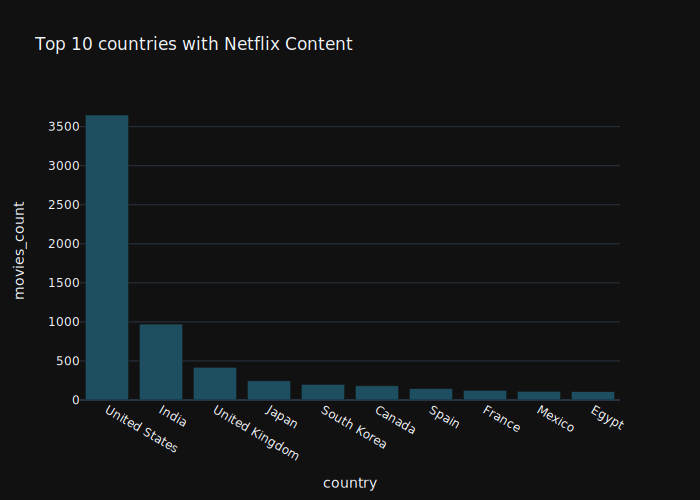

In [22]:
#  visulize top 10 countries with netflix content
df_country_viz_total = df[["type", "country"]]
df_country_viz_total = df_country_viz_total.groupby(['country'])["type"].count().reset_index().sort_values('type', 
                                                                                ascending= False).head(10)
df_country_viz_total = df_country_viz_total.rename(columns = {"type": "movies_count",})
fig1 = px.bar(df_country_viz_total, x='country', y='movies_count', color_discrete_sequence=px.colors.sequential.Blugrn_r,
       title='Top 10 countries with Netflix Content ', template="plotly_dark")
fig1.show(renderer="svg")

 As expect United State top the list of Top 10 countries with Netflix Content follow by india with Egypt take the position of tenth

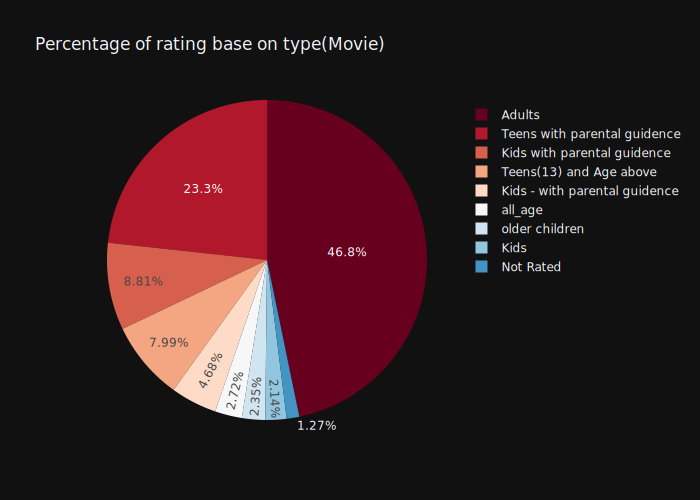

In [25]:
df_2 = df.query("type == 'Movie'")
df_2 = df_2[["title", "rating"]]
df_2 = df_2.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending = False)
df_2 = df_2.rename(columns = {"title": "movies_count"})
fig1=px.pie(df_2, names='rating', values='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='Percentage of rating base on type(Movie) ', template="plotly_dark")
fig1.show(renderer="svg")

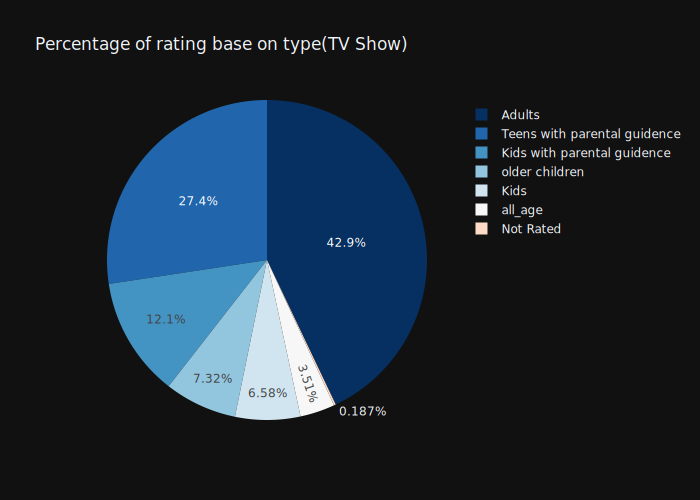

In [26]:
df_2 = df.query("type == 'TV Show'")
df_2 = df_2[["title", "rating"]]
df_2 = df_2.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending = False)
df_2 = df_2.rename(columns = {"title": "movies_count"})
fig1=px.pie(df_2, names='rating', values='movies_count', color_discrete_sequence=px.colors.sequential.RdBu_r,
       title='Percentage of rating base on type(TV Show) ', template="plotly_dark")
fig1.show(renderer="svg")

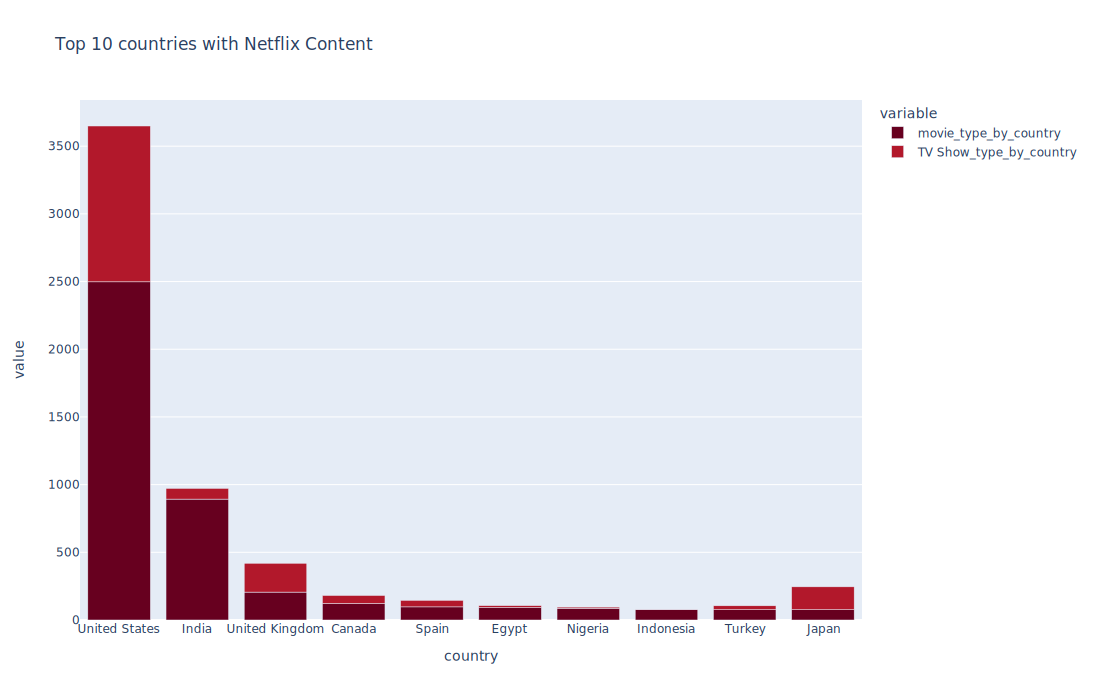

In [38]:
y = df[["country", "Genere", "type"]]
movies=y[y["type"]=="Movie"].groupby(["country"])["Genere"].count().reset_index().sort_values(by="Genere", ascending=False).head(10)
movies.rename(columns={"Genere": "movie_type_by_country"}, inplace=True)

x=y[y["type"]=="TV Show"].groupby(["country"])["Genere"].count().reset_index().sort_values(by="Genere", ascending=False)
x.rename(columns={"Genere": "TV Show_type_by_country"}, inplace=True)

final1 = movies.merge(x, how = 'left', left_on = 'country', right_on = 'country')

fig1 = px.bar(final1, x='country', y=['movie_type_by_country', "TV Show_type_by_country"], color_discrete_sequence=px.colors.sequential.RdBu,
       title='Top 10 countries with Netflix Content ', width=1100,
    height=700,)
fig1.show(renderer="svg")

In [35]:
final1

,country,movie_type_by_country,TV Show_type_by_country
0,United States,2498,1151
1,India,893,79
2,United Kingdom,206,213
3,Canada,122,59
4,Spain,97,48
5,Egypt,92,14
6,Nigeria,86,9
7,Indonesia,77,2
8,Turkey,76,29
9,Japan,76,169


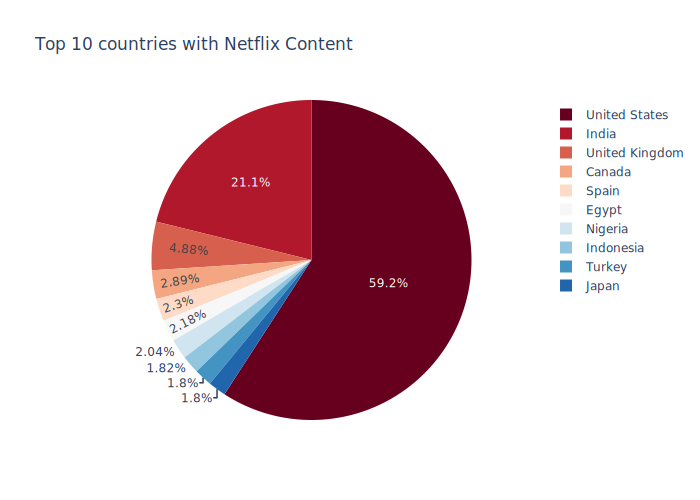

In [39]:
fig1 = px.pie(final1, names='country', values='movie_type_by_country', color_discrete_sequence=px.colors.sequential.RdBu,
       title='Top 10 countries with Netflix Content ')
fig1.show(renderer="svg")

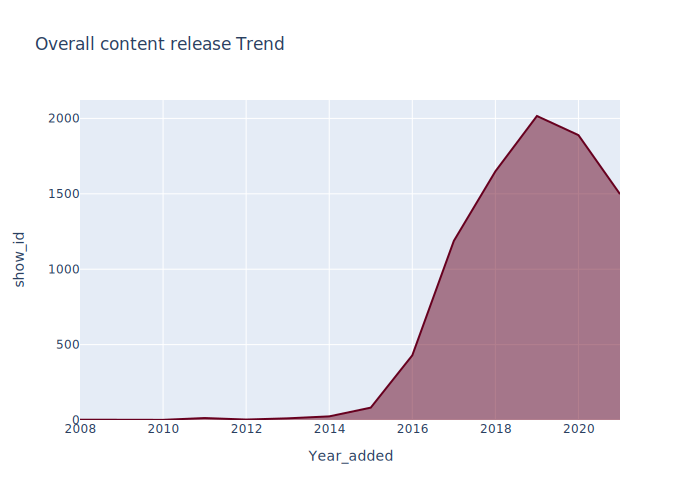

In [42]:
u = df[["Genere", "Year_added","Day_added", "Day_added", "show_id"]]
u=u.groupby("Year_added").count()["show_id"].reset_index()
df_5 = df.query("Year_added >= 2007")
df_5 = df_5.groupby("release_year")["show_id"].count().reset_index()

fig = px.area(u, x='Year_added', y='show_id', color_discrete_sequence=px.colors.sequential.RdBu,
      title='Overall content release Trend')
fig.show(renderer="svg")


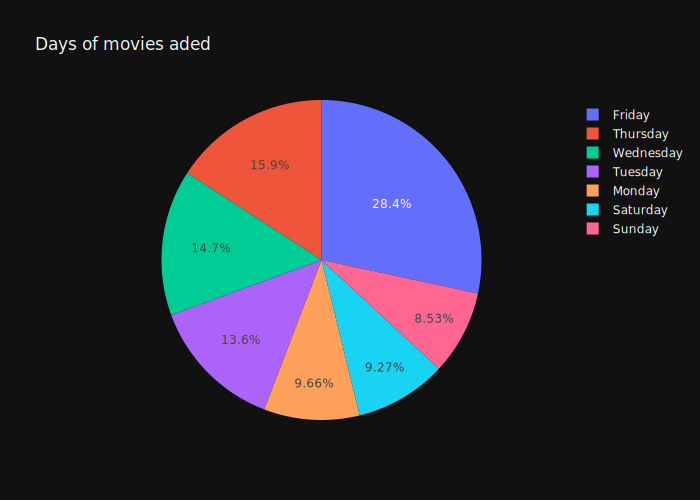

In [41]:
u = df[["Day_added", "show_id", "type", "Genere", "duration"]]
u = u.groupby("Day_added").count()["show_id"].reset_index().sort_values(by="show_id", ascending=False)
fig = px.pie(u, names="Day_added", values="show_id", template="plotly_dark", title="Days of movies aded")
fig.show(renderer="svg")

In [39]:
import matplotlib.pyplot as plt



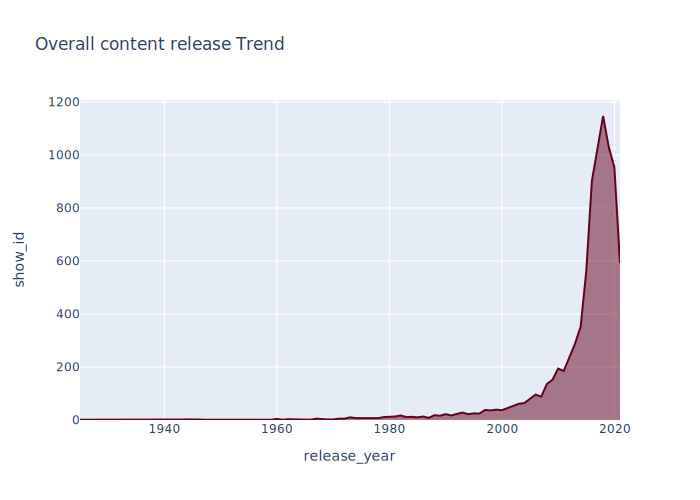

In [43]:
df_5 = df.query("Year_added >= 2007")
df_5 = df_5.groupby("release_year")["show_id"].count().reset_index()

fig = px.area(df_5, x='release_year', y='show_id', color_discrete_sequence=px.colors.sequential.RdBu,
      title='Overall content release Trend')
fig.show(renderer="svg")


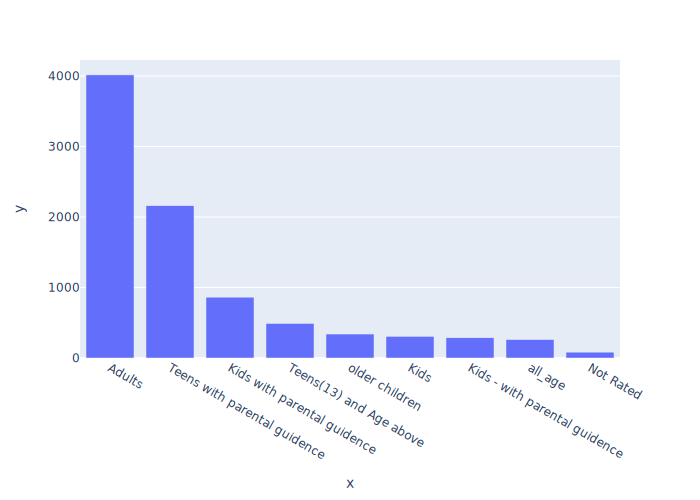

In [45]:
fig =px.bar(x=df["rating"].value_counts().index, y= df["rating"].value_counts())
fig.show(renderer="svg")